In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import pandas as pd

### Import dataset

In [2]:
# Train data
from types import LambdaType


train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    # transform features into normalized tensors
    transform=ToTensor()
)

In [3]:
# Test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### Visualizing the training data

In [4]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

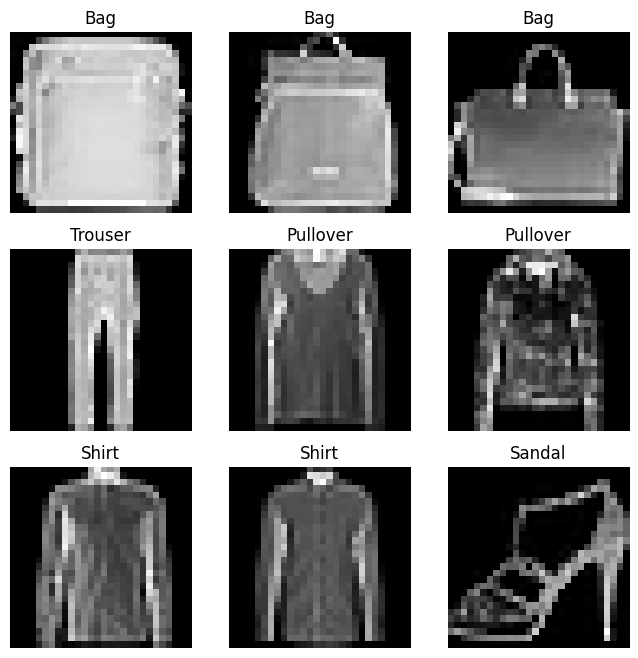

In [5]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Create Data Loaders

In [6]:
batch_size = 64

train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [7]:
for X, y in train_dataloader:
    print(f"Shape of X [N, C, H, W] : {X.shape}")
    break

Shape of X [N, C, H, W] : torch.Size([64, 1, 28, 28])


### NN models

In [8]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        output = self.linear_relu_stack(x)
        return output

In [9]:
model = NeuralNetwork().to("cpu")
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### Loss and Optimizer function

In [10]:
# define loss function
loss_func = nn.CrossEntropyLoss()

In [11]:
# define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

1e-3 is a common default value for the learning rate in the NN training.

### Train and Test functions

In [12]:
def train(dataloader, model, loss_func, optimizer):
    size = len(dataloader.dataset)
    # set the model to train mode
    model.train()

    for batch, (X, y) in enumerate(dataloader):
        # compute prediction and loss
        pred = model(X)
        loss = loss_func(pred, y)

        # backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [13]:
def test(dataloader, model, loss_func):
    size = len(dataloader.dataset)
    # set the model to evaluation mode, disabling dropout and batch normalization
    model.eval()
    
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_func(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    # accuracy of the model on the test set
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

### Model predictions

In [15]:
epochs = 20
for ep in range(epochs):
    print("Epoch: ", ep, "\n")
    train(train_dataloader, model, loss_func, optimizer)
    test(test_dataloader, model, loss_func)

Epoch:  0 

loss: 0.803552  [    0/60000]
loss: 0.882929  [ 6400/60000]
loss: 0.646508  [12800/60000]
loss: 0.848157  [19200/60000]
loss: 0.751127  [25600/60000]
loss: 0.737717  [32000/60000]
loss: 0.829535  [38400/60000]
loss: 0.781803  [44800/60000]
loss: 0.807697  [51200/60000]
loss: 0.767927  [57600/60000]
Test Error: 
 Accuracy: 71.4%, Avg loss: 0.765216 

Epoch:  1 

loss: 0.766406  [    0/60000]
loss: 0.853404  [ 6400/60000]
loss: 0.614678  [12800/60000]
loss: 0.822749  [19200/60000]
loss: 0.729661  [25600/60000]
loss: 0.711837  [32000/60000]
loss: 0.804464  [38400/60000]
loss: 0.764931  [44800/60000]
loss: 0.785031  [51200/60000]
loss: 0.746382  [57600/60000]
Test Error: 
 Accuracy: 73.0%, Avg loss: 0.742832 

Epoch:  2 

loss: 0.734049  [    0/60000]
loss: 0.826930  [ 6400/60000]
loss: 0.587584  [12800/60000]
loss: 0.801277  [19200/60000]
loss: 0.711252  [25600/60000]
loss: 0.690519  [32000/60000]
loss: 0.781590  [38400/60000]
loss: 0.750124  [44800/60000]
loss: 0.765553  [512

The test accuracy is 80.8%.